# IMPORT LIBRARY

In [ ]:
!pip install pandas

In [ ]:
import os
import numpy as np
import pandas as pd
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pathlib import Path

# MENGAMBIL DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# URL tempat dataset CSV disimpan
url = 'https://raw.githubusercontent.com/kucingku-capstone/machine-learning/main/dataset/cats_updated.csv'

# Membaca dataset dari URL dan menyimpannya dalam DataFrame df
df = pd.read_csv(url)

# Menampilkan beberapa baris pertama dari DataFrame untuk memahami struktur datanya
print(df.head())

   Unnamed: 0        id                                                url  \
0           0  46744842  https://www.petfinder.com/cat/arianna-46744842...   
1           1  46717321  https://www.petfinder.com/cat/ozzy-46717321/oh...   
2           2  46626338  https://www.petfinder.com/cat/zena-46626338/ca...   
3           3  46620170  https://www.petfinder.com/cat/mika-46620170/ca...   
4           4  46582751  https://www.petfinder.com/cat/ruby-46582751/fl...   

  type     age  gender         size   coat       breed  \
0  Cat   Adult  Female       Medium  Short  Abyssinian   
1  Cat   Adult    Male  Extra Large  Short  Abyssinian   
2  Cat  Senior  Female       Medium  Short  Abyssinian   
3  Cat    Baby  Female        Small  Short  Abyssinian   
4  Cat   Young  Female       Medium  Short  Abyssinian   

                                              photos  \
0  [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...   
1  [{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...   
2  [{'small': 

In [ ]:
# Menyimpan nama kolom yang akan dihapus dalam sebuah list
columns_to_drop = ['Unnamed: 0', 'url', 'photos', 'med_photos']

# Menghapus kolom-kolom yang ada dalam list dari DataFrame
df_cleaned = df.drop(columns=columns_to_drop, axis=1)

# Menampilkan beberapa baris pertama dari DataFrame setelah penghapusan kolom
print(df_cleaned.head())

         id type     age  gender         size   coat       breed
0  46744842  Cat   Adult  Female       Medium  Short  Abyssinian
1  46717321  Cat   Adult    Male  Extra Large  Short  Abyssinian
2  46626338  Cat  Senior  Female       Medium  Short  Abyssinian
3  46620170  Cat    Baby  Female        Small  Short  Abyssinian
4  46582751  Cat   Young  Female       Medium  Short  Abyssinian


In [ ]:
train_data, test_data = train_test_split(df_cleaned, test_size=0.2, random_state=42)

# Menampilkan beberapa baris pertama dari data latih
print("Data Latih:")
print(train_data.head())

# Menampilkan beberapa baris pertama dari data uji
print("\nData Uji:")
print(test_data.head())

Data Latih:
             id type    age  gender    size   coat               breed
34863  44588132  Cat  Young  Female   Small   Long           Himalayan
35599  35352265  Cat  Adult    Male  Medium   Long           Himalayan
57829  44416106  Cat  Young    Male   Large  Short               Tiger
3792   45176364  Cat  Adult  Female  Medium  Short  American Shorthair
48731  45766684  Cat   Baby  Female   Small  Short        Russian Blue

Data Uji:
             id type    age  gender    size   coat  \
936    25669563  Cat   Baby    Male  Medium  Short   
9634   22871388  Cat  Adult    Male  Medium  Short   
33510  45993124  Cat  Adult  Female  Medium  Short   
39651  23995449  Cat  Young  Female   Large  Short   
43441  35694499  Cat   Baby  Female   Small   Long   

                                       breed  
936                         American Bobtail  
9634                                  Bombay  
33510  Extra-Toes Cat - Hemingway Polydactyl  
39651                                 

# MEMBAGI DATASET

In [ ]:
# Menyimpan data latih ke dalam file CSV
train_data.to_csv('/content/drive/MyDrive/Capstone/Dataset/train_data.csv', index=False)

# Menyimpan data uji ke dalam file CSV
test_data.to_csv('/content/drive/MyDrive/Capstone/Dataset/test_data.csv', index=False)



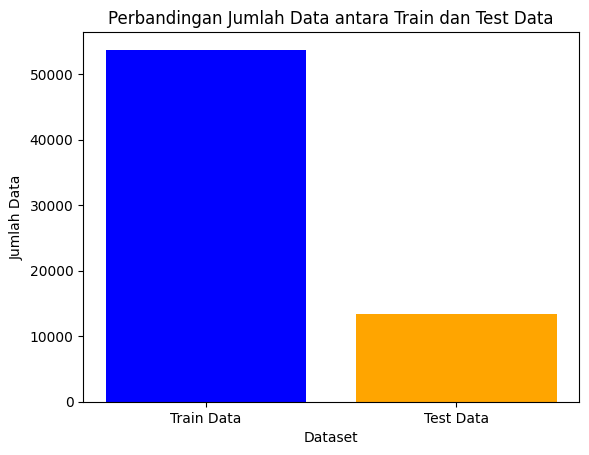

In [ ]:
# Menyiapkan data untuk visualisasi
datasets = ['Train Data', 'Test Data']
jumlah_data = [train_data.shape[0], test_data.shape[0]]

# Membuat plot batang
plt.bar(datasets, jumlah_data, color=['blue', 'orange'])
plt.title('Perbandingan Jumlah Data antara Train dan Test Data')
plt.xlabel('Dataset')
plt.ylabel('Jumlah Data')
plt.show()

Text(0, 0.5, 'Jumlah Kucing')

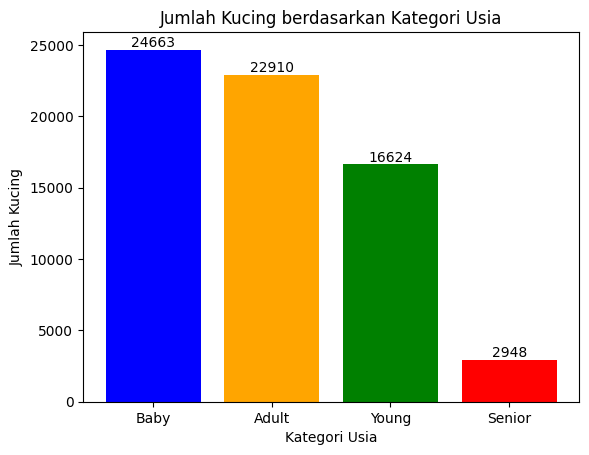

In [ ]:
# Menyiapkan data untuk visualisasi
datasets = ['Train Data', 'Test Data']
jumlah_data = [train_data.shape[0], test_data.shape[0]]

# Menghitung jumlah kucing berdasarkan usia
jumlah_usia = df['age'].value_counts()

# Membuat plot batang
plt.bar(jumlah_usia.index, jumlah_usia.values, color=['blue', 'orange', 'green', 'red'])

# Menambahkan label di atas batang
for i in range(len(jumlah_usia)):
    plt.text(i, jumlah_usia.values[i] + 0.1, str(jumlah_usia.values[i]), ha='center', va='bottom')

# Menambahkan judul dan label
plt.title('Jumlah Kucing berdasarkan Kategori Usia')
plt.xlabel('Kategori Usia')
plt.ylabel('Jumlah Kucing')
